# **AIA // COMPUTER VISION**
PRINCIPAL COMPONENT ANALYSIS OF THE URBAN BLOCK DATASET

**TUTORS**: GABRIELLA ROSSI & ILIANA PAPADOPOULOU

**STUDENTS:** JOAO SILVA & GERMAN BODENBENDER

### IMPORT LIBRARIES

In [ ]:
import pandas as pd #Pandas handles tabular data
pd.set_option('display.float_format', lambda x: '%.3f' % x) # turn off scientific notation and too much decimal blah
import matplotlib.pyplot as plt # standard plotting library
import numpy as np #Numpy for linear algebra & co
import seaborn as sns # For pretty dataviz
sns.set_style("darkgrid") # Define style for dataviz

In [ ]:
from google.colab import drive
mount_point = '/content/gdrive'
drive.mount(mount_point)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### LOAD THE URBAN BLOCK DATASET

In [ ]:
# load dataset into Pandas DataFrame
data = pd.read_csv("/content/gdrive/MyDrive/DATASETS/AIA-COM_VISION-URBAN_BLOCK-FULL_SAMPLE.csv") 
                 

### DATA EXPLORATION

In the following, we will do some of the standard inspections one should do with every new dataset to get a feeling for its påroperties.

In [ ]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Plot_Min_Witdh        3150 non-null   float64
 1   Plot_Count            3150 non-null   int64  
 2   Build_Min_Depth       3150 non-null   float64
 3   Build_Max_Depth       3150 non-null   float64
 4   Build_Min_Heigth      3150 non-null   float64
 5   Build_Max_Heigth      3150 non-null   float64
 6   Building_Volume       3150 non-null   float64
 7   Building_Area         3150 non-null   float64
 8   Green_Area            3150 non-null   float64
 9   Average_FAR           3150 non-null   float64
 10  Average_Build_Heigth  3150 non-null   float64
 11  Gross_area            3150 non-null   float64
 12  Radiation_Min         3150 non-null   float64
 13  Radiation_Total       3150 non-null   float64
 14  Green_Comfort         3150 non-null   float64
 15  Energy_Balance       

In [ ]:
# Print the first 5 rows
data.head()

,Plot_Min_Witdh,Plot_Count,Build_Min_Depth,Build_Max_Depth,Build_Min_Heigth,Build_Max_Heigth,Building_Volume,Building_Area,Green_Area,Average_FAR,Average_Build_Heigth,Gross_area,Radiation_Min,Radiation_Total,Green_Comfort,Energy_Balance
0,23.567,12,18.897,87.101,33.424,69.709,905684.790,19016.097,2294.837,45.302,49.288,905684.790,6.750,9020.000,0.144,-3999265.330
1,23.594,12,18.921,87.075,33.465,70.018,861633.610,18218.498,3092.435,41.294,49.446,861633.610,3.750,8766.750,0.202,-3738010.460
2,23.618,12,18.937,87.030,33.503,70.318,849853.680,17747.623,3563.310,42.801,49.598,849853.680,6.750,8293.250,0.235,-3803102.110
3,23.640,12,18.953,86.941,33.520,70.610,974329.640,20143.463,1167.471,48.358,49.736,974329.640,6.750,9489.250,0.070,-4464418.910
4,23.659,12,18.964,86.850,33.539,70.873,762944.570,15490.498,5820.436,40.798,49.861,762944.570,6.750,6987.000,0.216,-3642095.960


In [ ]:
# Descriptive statistics
data.describe()

,Plot_Min_Witdh,Plot_Count,Build_Min_Depth,Build_Max_Depth,Build_Min_Heigth,Build_Max_Heigth,Building_Volume,Building_Area,Green_Area,Average_FAR,Average_Build_Heigth,Gross_area,Radiation_Min,Radiation_Total,Green_Comfort,Energy_Balance
count,3150.000,3150.000,3150.000,3150.000,3150.000,3150.000,3150.000,3150.000,3150.000,3150.000,3150.000,3150.000,3150.000,3150.000,3150.000,3150.000
mean,23.037,12.485,17.727,60.238,21.269,53.280,667136.427,17980.015,3330.918,32.008,36.749,667136.427,4.485,8512.388,0.337,-886345.257
std,0.920,1.910,0.738,17.065,7.186,11.127,135185.209,1531.253,1531.253,6.697,6.773,135185.209,2.387,813.298,2.750,1796693.266
min,20.505,12.000,15.196,21.204,5.458,23.415,294898.170,13309.567,1.183,14.227,15.397,294898.170,0.000,5968.500,0.002,-8200962.020
25%,22.582,12.000,17.331,46.791,15.784,46.147,581482.015,17061.374,2207.662,27.818,32.327,581482.015,3.000,7989.312,0.153,-1658507.908
50%,22.895,12.000,17.683,60.922,21.059,50.389,644343.580,18101.548,3209.386,30.558,35.123,644343.580,4.500,8565.500,0.197,-459978.850
75%,23.281,12.000,18.091,73.158,25.678,60.183,734511.770,19103.271,4249.559,34.615,39.032,734511.770,6.500,9100.188,0.238,210374.425
max,29.385,20.000,19.848,97.973,39.051,87.397,1201516.210,21309.751,8001.367,57.094,60.620,1201516.210,15.000,10724.250,145.725,5678522.430


In [ ]:
clean_data = data
clean_data.drop('Plot_Count', inplace=True, axis=1)
clean_data.drop('Green_Comfort', inplace=True, axis=1)

In [ ]:
another_data = clean_data[['Build_Min_Depth', 'Build_Max_Depth', 'Build_Min_Heigth', 'Building_Volume']]

In [ ]:
g = sns.pairplot(another_data, x_vars=['Build_Min_Depth', 'Build_Max_Depth', 'Build_Min_Heigth', 'Building_Volume'], y_vars=['Build_Min_Depth', 'Build_Max_Depth'], hue='Build_Min_Depth', palette='PuRd', diag_kind="kde")


In [ ]:
pal = sns.color_palette("mako", as_cmap=True)
# Here, one of my very favorite visualizations... save that one.
# Sns pairplot provides a matrix with scatters on the triangles, and the distribution on the diagonal
sns.pairplot(clean_data, hue='Build_Min_Depth', palette='PuRd', kind="hist")

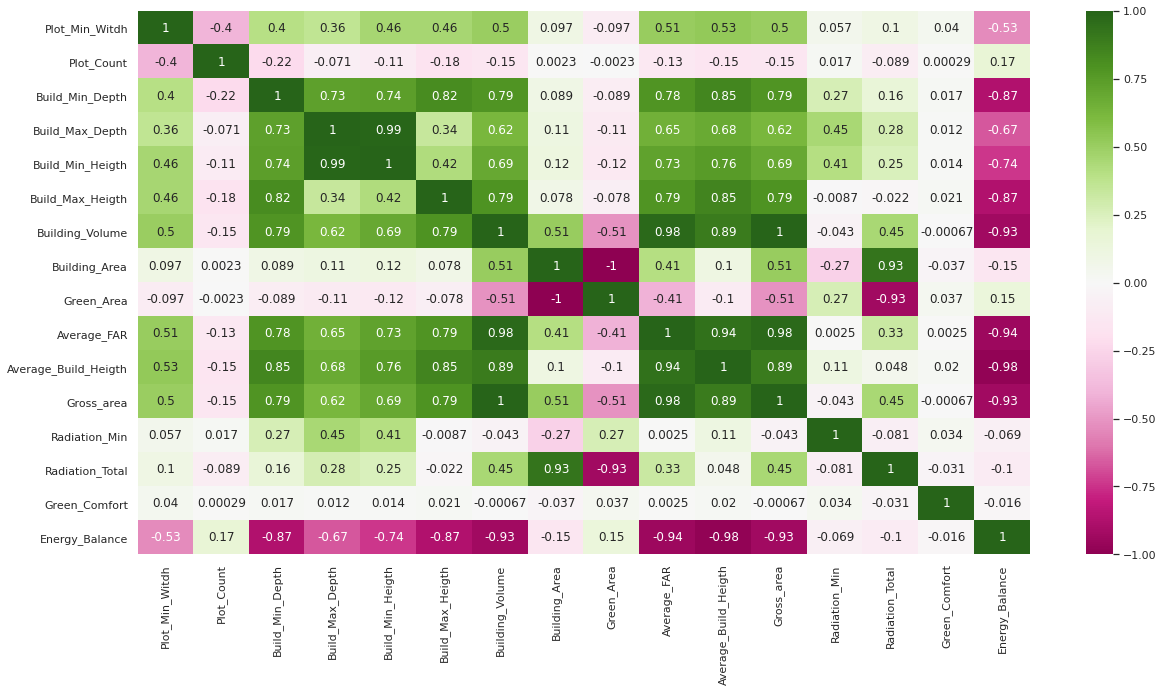

In [ ]:
# And lastly, a correlation plot
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap="PiYG", ax=ax)

### Preprocessing

In [ ]:
# Transfer the (categorical) outcome of interest to the index (PCA only works with numerical data)
data.set_index('Energy_Balance', inplace=True)

Since in PCA exercises the features used can be of different scale (eg. meter & kilometer) or dispolay a very different variance, it is common practice in ML workflow to normalize features. By doing so, we prevent features with high variance or scale ranges to dominate.

We here apply a standard scaler, where we substract for every feature its mean, and thyen divide by its standard deviation.

$$StandardScale() = {\frac {X-\mu }{\sigma }}$$

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Let's standard-scale our data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
# What are mean and Sd now?
pd.DataFrame(data_scaled, columns=data.columns).describe()

,Plot_Min_Witdh,Plot_Count,Build_Min_Depth,Build_Max_Depth,Build_Min_Heigth,Build_Max_Heigth,Building_Volume,Building_Area,Green_Area,Average_FAR,Average_Build_Heigth,Gross_area,Radiation_Min,Radiation_Total,Green_Comfort
count,3150.000,3150.000,3150.000,3150.000,3150.000,3150.000,3150.000,3150.000,3150.000,3150.000,3150.000,3150.000,3150.000,3150.000,3150.000
mean,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.752,-0.254,-3.431,-2.288,-2.201,-2.684,-2.754,-3.051,-2.175,-2.656,-3.153,-2.754,-1.879,-3.128,-0.122
25%,-0.495,-0.254,-0.536,-0.788,-0.763,-0.641,-0.634,-0.600,-0.734,-0.626,-0.653,-0.634,-0.622,-0.643,-0.067
50%,-0.155,-0.254,-0.060,0.040,-0.029,-0.260,-0.169,0.079,-0.079,-0.217,-0.240,-0.169,0.006,0.065,-0.051
75%,0.265,-0.254,0.494,0.757,0.614,0.621,0.498,0.734,0.600,0.389,0.337,0.498,0.844,0.723,-0.036
max,6.898,3.936,2.877,2.212,2.475,3.067,3.954,2.175,3.051,3.747,3.525,3.954,4.406,2.720,52.868


### Executingh PCA

In [ ]:
# Instantiate a PCA object
from sklearn.decomposition import PCA # PCA from  sklearn, the python ML standard library
model = PCA() # Number of components needs to be defined. We just for illustration take about half of the numbers of features

In [ ]:
# Fitr the model
model.fit(data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# Fit and transform the data
data_reduced = model.transform(data_scaled)

In [ ]:
new_data = pd.DataFrame(data_reduced, columns=data.columns)
new_data['Green_Area']

0      -0.084
1      -0.240
2      -0.177
3       0.012
4      -0.224
        ...  
3145   -0.197
3146    0.021
3147   -0.012
3148   -0.005
3149    0.445
Name: Green_Area, Length: 3150, dtype: float64

### Inspecting Results

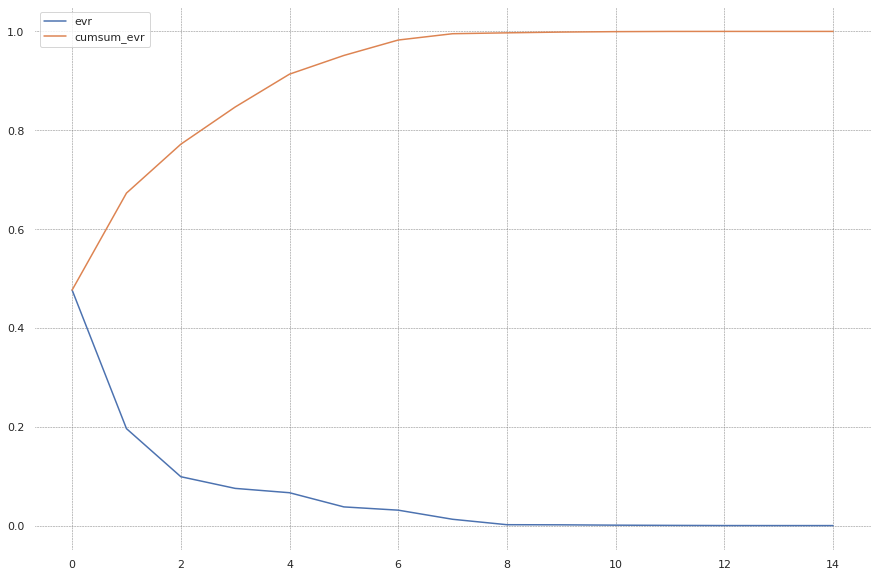

In [ ]:

plot_data = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()
sns.set(rc={'figure.figsize':(15,10),'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

In [ ]:
print(model.explained_variance_ratio_)

[4.76640211e-01 1.96199652e-01 9.89015384e-02 7.52821258e-02
 6.65044295e-02 3.78108171e-02 3.12146025e-02 1.27717157e-02
 1.78926411e-03 1.55646932e-03 8.54431553e-04 4.16817483e-04
 5.79250441e-05 3.52963611e-29 6.98916134e-33]


PLOTTING ALL THE PCS

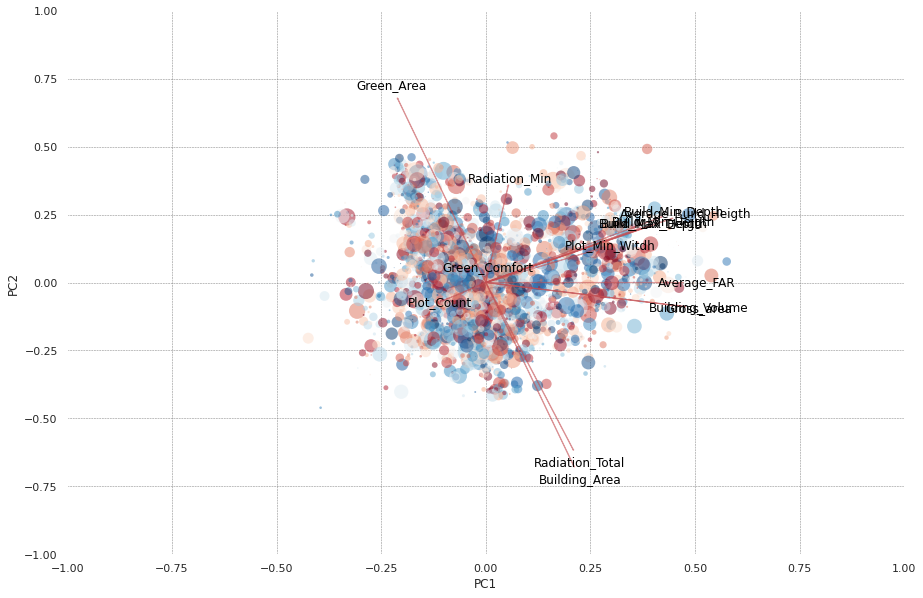

In [ ]:
n = 3150
r = 2 * np.random.rand(n)
theta = 2 * np.pi * np.random.rand(n)
area = 400 * r**2 * np.random.rand(n)
colors = theta

plt.rcParams['axes.facecolor'] = 'white'
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=area, marker=".", alpha=0.5, edgecolors='none', c=colors, cmap=plt.cm.RdBu)
    for i in range(n):
        plt.arrow(0, 0, (coeff[i,0])*1.3, (coeff[i,1]*1.3), color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.4, coeff[i,1] * 1.4, data.columns[i], color = 'black', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.4, coeff[i,1] * 1.4, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)


#Call the function. Use only the 2 PCs.

myplot(data_reduced[:,0:2],np.transpose(model.components_[0:2, :]))
plt.show()


The important features are the ones that influence more the components and thus, have a large absolute value/score on the component.

In [ ]:
pcscores = pd.DataFrame(data_reduced)
loadings = pd.DataFrame(model.components_, columns=data.columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

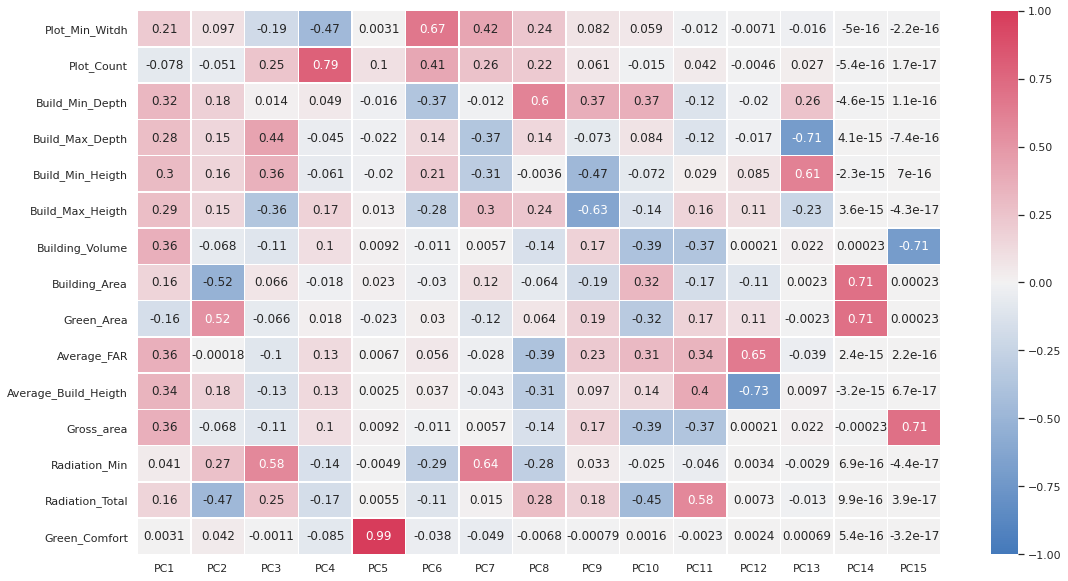

In [ ]:
#cmap="viridis"
#cmap="crest"
#cmap="mako"
#cmap=pal
pal = sns.diverging_palette(250, 5, as_cmap=True)
fig, ax = plt.subplots(figsize=(18,10))
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, cmap=pal, vmin=-1, vmax=1, annot=True)

In [ ]:
# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = data.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

print(df)

       0                     1
0    PC0            Gross_area
1    PC1         Building_Area
2    PC2         Radiation_Min
3    PC3            Plot_Count
4    PC4         Green_Comfort
5    PC5        Plot_Min_Witdh
6    PC6         Radiation_Min
7    PC7       Build_Min_Depth
8    PC8      Build_Max_Heigth
9    PC9       Radiation_Total
10  PC10       Radiation_Total
11  PC11  Average_Build_Heigth
12  PC12       Build_Max_Depth
13  PC13            Green_Area
14  PC14       Building_Volume
